In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

path = "~/jupyter/data/cryptocurrencypricehistory"

In [98]:
def load_data(name="bitcoin_price", headers=['Date', "Price"]):
    df = pd.read_csv(os.path.join(path, name + ".csv"), parse_dates=[0], header=None if headers else 0)
    if headers:
        df.columns = headers
    return df
bitcoin_price = load_data("bitcoin_price_latest")
bitcoin_price = bitcoin_price.set_index("Date")
bitcoin_price.head()

,Price
Date,
2016-12-15,776.752150
2016-12-16,781.568375
2016-12-17,788.705500
2016-12-18,788.405750
2016-12-19,789.524125


In [95]:
bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-12-15 to 2017-12-14
Data columns (total 1 columns):
Price    365 non-null float64
dtypes: float64(1)
memory usage: 15.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4095a43c88>]], dtype=object)

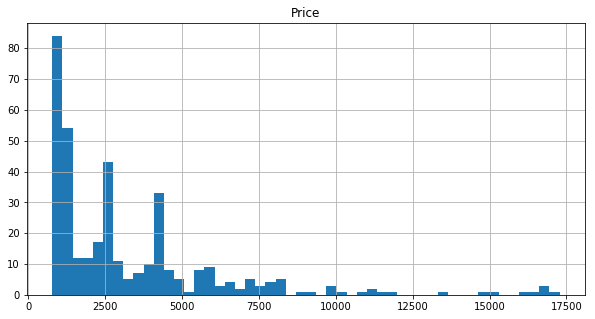

In [75]:
bitcoin_price.hist(bins=50, figsize=(10,5))

In [78]:
bitcoin_price.describe()

,Price
count,365.000000
mean,3296.533909
std,3057.575327
min,776.752150
25%,1150.605714
50%,2446.142414
75%,4329.955000
max,17276.393333


In [94]:
bit_ds = load_data("bitcoin_dataset", None)

In [96]:
bit_ds.info()
bit_ds = bit_ds.set_index("Date")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 24 columns):
Date                                                   2920 non-null datetime64[ns]
btc_market_price                                       2920 non-null float64
btc_total_bitcoins                                     2920 non-null float64
btc_market_cap                                         2920 non-null float64
btc_trade_volume                                       2899 non-null float64
btc_blocks_size                                        2920 non-null float64
btc_avg_block_size                                     2920 non-null float64
btc_n_orphaned_blocks                                  2920 non-null float64
btc_n_transactions_per_block                           2920 non-null float64
btc_median_confirmation_time                           2920 non-null float64
btc_hash_rate                                          2920 non-null float64
btc_difficulty                         

KeyError: 'Date'

In [91]:
bitcoin_all = pd.concat([bit_ds, bitcoin_price], axis=1, join='inner')
bitcoin_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 2016-12-15 to 2017-11-07
Freq: D
Data columns (total 24 columns):
btc_market_price                                       328 non-null float64
btc_total_bitcoins                                     328 non-null float64
btc_market_cap                                         328 non-null float64
btc_trade_volume                                       328 non-null float64
btc_blocks_size                                        328 non-null float64
btc_avg_block_size                                     328 non-null float64
btc_n_orphaned_blocks                                  328 non-null float64
btc_n_transactions_per_block                           328 non-null float64
btc_median_confirmation_time                           328 non-null float64
btc_hash_rate                                          328 non-null float64
btc_difficulty                                         328 non-null float64
btc_miners_revenue              

In [100]:
bitcoin_all.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Price
Date,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-15,776.752150,16045450.0,1.247213e+10,1.535787e+07,94138.006728,0.955426,0.0,2225.866142,14.900000,1.958065e+06,3.083123e+11,1249509.750,100.432195,0.591153,4.641313,479430.0,282685.0,179454927.0,274282.0,233091.0,2.047186e+06,285532.104288,2.219441e+08,776.752150
2016-12-16,781.568375,16047112.5,1.257371e+10,1.797331e+07,94266.566762,0.966617,0.0,2100.458647,17.025000,2.050572e+06,3.101539e+11,1317539.325,97.579056,0.572772,4.936659,495266.0,279361.0,179734288.0,235086.0,207424.0,1.883878e+06,307291.634288,2.407784e+08,781.568375
2016-12-17,788.705500,16048912.5,1.269453e+10,1.706849e+07,94384.609484,0.814088,1.0,1648.510345,15.100000,2.235586e+06,3.101539e+11,1439997.295,81.663484,0.812811,6.267997,458680.0,239034.0,179973322.0,232272.0,178464.0,1.323237e+06,233038.686093,1.843313e+08,788.705500
2016-12-18,788.405750,16050675.0,1.268517e+10,1.024364e+07,94506.069193,0.861416,0.0,1672.262411,9.833333,2.173914e+06,3.101539e+11,1398471.240,80.819594,0.934870,6.178458,418498.0,235789.0,180209111.0,281182.0,177716.0,1.411673e+06,197173.827491,1.558304e+08,788.405750
2016-12-19,789.524125,16052562.5,1.269758e+10,1.530193e+07,94645.199015,0.915328,1.0,1874.026316,13.850000,2.343510e+06,3.101539e+11,1511601.000,104.709086,0.714653,5.566838,508681.0,284852.0,180493963.0,292493.0,194881.0,1.851507e+06,280515.022193,2.218874e+08,789.524125


/home/derek/anaconda3/envs/pytorch/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


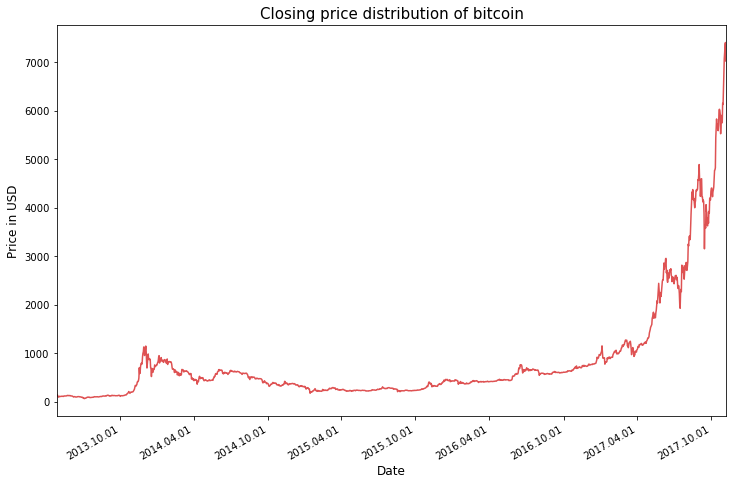

In [104]:
import matplotlib.dates as mdates

def plot_price(df):
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

    fig, ax = plt.subplots(figsize=(12,8))
    sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title("Closing price distribution of bitcoin", fontsize=15)
    plt.show()
plot_price(df)

In [111]:
from fbprophet import Prophet
m = Prophet()
def predict_fb(m, df):
    df_fb = df
    df_fb["ds"] = df["Date"]
    df_fb["y"] = df["Close"]
    m.fit(df_fb);
    future = m.make_future_dataframe(periods=100)
    forecast = m.predict(future)
    return forecast
forecast = predict_fb(m, df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1750,2018-02-11,6825.295879,6299.947166,7295.603770
1751,2018-02-12,6838.125156,6290.514944,7303.556982
1752,2018-02-13,6846.497236,6326.031153,7344.664239
1753,2018-02-14,6849.344211,6289.427527,7305.282748
1754,2018-02-15,6861.800132,6302.540775,7360.818219


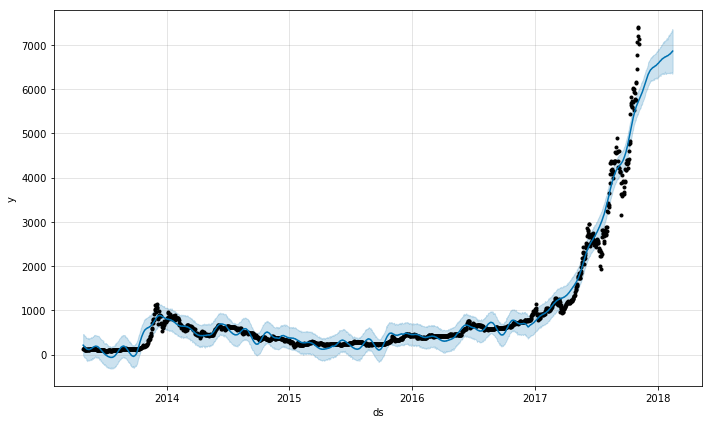

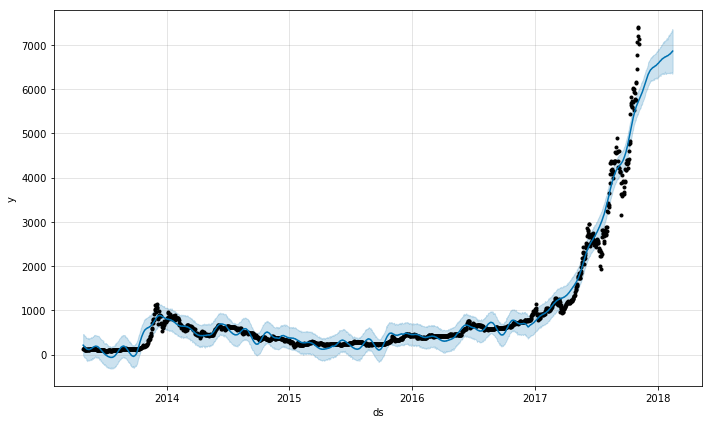

In [103]:
m.plot(forecast)

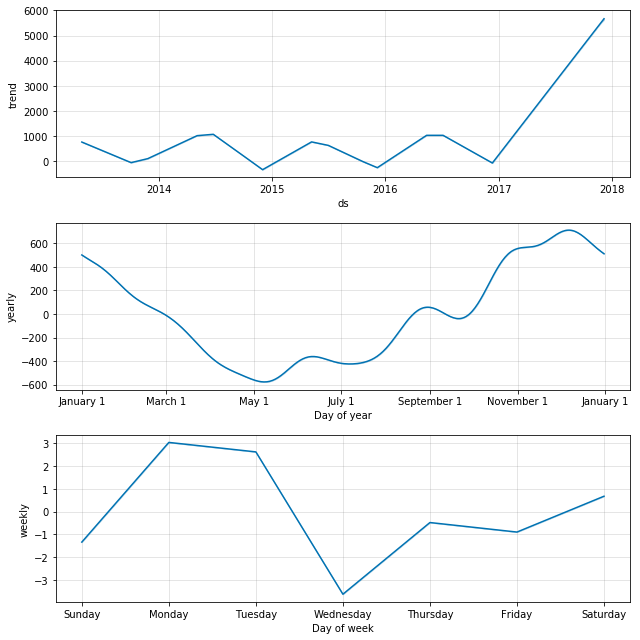

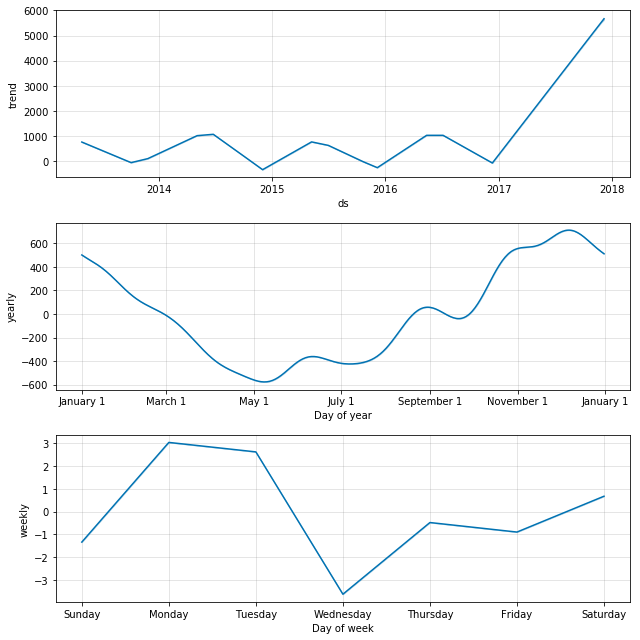

In [11]:
m.plot_components(forecast)

In [113]:
df_latest = pd.read_csv(os.path.join(path, "bitcoin_price_latest.csv"))
df_latest.columns = ["Date", "Close"]
m = Prophet()
forecast = predict_fb(m, df_latest)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
459,2018-03-20,23595.447200,22067.666057,25033.587868
460,2018-03-21,23727.625636,22235.122598,25211.475023
461,2018-03-22,23913.435610,22390.880428,25382.820703
462,2018-03-23,23917.859709,22299.405178,25558.831328
463,2018-03-24,24015.367485,22515.098284,25531.866277


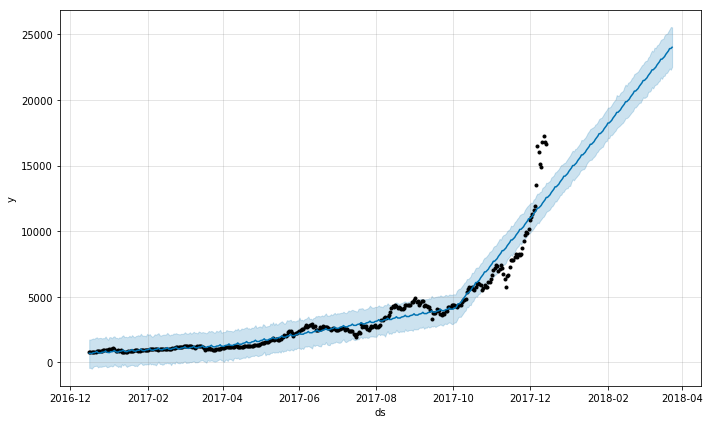

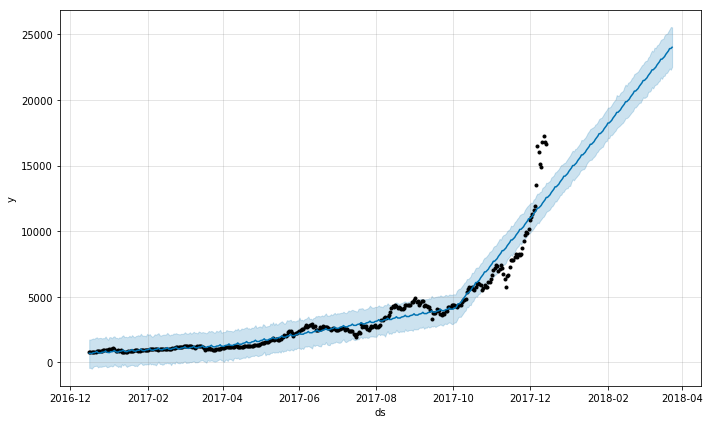

In [114]:
m.plot(forecast)

In [115]:
corr_matrix = bitcoin_all.corr()

In [117]:
corr_matrix["Price"].sort_values(ascending=False)

btc_market_price                                       1.000000
Price                                                  1.000000
btc_market_cap                                         0.999967
btc_miners_revenue                                     0.970602
btc_difficulty                                         0.964116
btc_cost_per_transaction                               0.956169
btc_total_bitcoins                                     0.923208
btc_blocks_size                                        0.921067
btc_hash_rate                                          0.917174
btc_n_transactions_total                               0.914789
btc_estimated_transaction_volume_usd                   0.837724
btc_trade_volume                                       0.781610
btc_n_unique_addresses                                 0.339466
btc_cost_per_transaction_percent                       0.280057
btc_transaction_fees                                   0.158286
btc_avg_block_size                      

In [203]:
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

In [156]:
bitcoin_all.loc[:,bitcoin_all.columns!="Price"].iloc[[1,2,3]]

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,,,
2016-12-16,781.568375,16047112.5,1.257371e+10,1.797331e+07,94266.566762,0.966617,0.0,2100.458647,17.025000,2.050572e+06,3.101539e+11,1317539.325,97.579056,0.572772,4.936659,495266.0,279361.0,179734288.0,235086.0,207424.0,1.883878e+06,307291.634288,2.407784e+08
2016-12-17,788.705500,16048912.5,1.269453e+10,1.706849e+07,94384.609484,0.814088,1.0,1648.510345,15.100000,2.235586e+06,3.101539e+11,1439997.295,81.663484,0.812811,6.267997,458680.0,239034.0,179973322.0,232272.0,178464.0,1.323237e+06,233038.686093,1.843313e+08
2016-12-18,788.405750,16050675.0,1.268517e+10,1.024364e+07,94506.069193,0.861416,0.0,1672.262411,9.833333,2.173914e+06,3.101539e+11,1398471.240,80.819594,0.934870,6.178458,418498.0,235789.0,180209111.0,281182.0,177716.0,1.411673e+06,197173.827491,1.558304e+08


In [281]:
bitcoin_all["Price"].iloc[[1,2]]

Date
2016-12-16    781.568375
2016-12-17    788.705500
Freq: D, Name: Price, dtype: float64

In [282]:
slices = splits.split(bitcoin_all)

In [279]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV


train_index, test_index = next(slices)
train_data, test_data = bitcoin_all.iloc[train_index], bitcoin_all.iloc[test_index]
model = XGBRegressor()
train_x = train_data.drop(["Price", "btc_market_price", "btc_market_cap"], axis=1)
train_y = train_data["btc_market_price"]
# model.fit(train_data.loc[:,bitcoin_all.columns!="Price"], train_data["Price"])
# model.fit(train_data[df.columns.difference(["Price", "btc_market_price"])], train_data["Price"])
model.fit(train_x, train_y)


test_x = test_data.drop(["Price", "btc_market_price", "btc_market_cap"], axis=1)
test_y = test_data["btc_market_price"]
y_pred = model.predict(test_x)

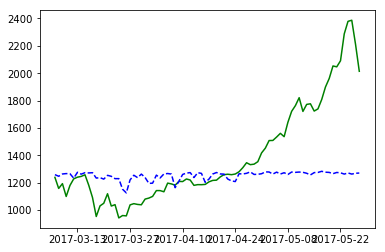

In [280]:
plt.plot(test_data.index, test_y, "g-", label="real value")
plt.plot(test_data.index, y_pred, "b--", label="prediction")

In [260]:
train_x.columns

Index(['btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume',
       'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks',
       'btc_n_transactions_per_block', 'btc_median_confirmation_time',
       'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction_percent',
       'btc_cost_per_transaction', 'btc_n_unique_addresses',
       'btc_n_transactions', 'btc_n_transactions_total',
       'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [211]:
train_data, test_data = bitcoin_all.iloc[:-10], bitcoin_all.iloc[-10:]
model = XGBRegressor()
model.fit(train_data.loc[:,bitcoin_all.columns!="Price"], train_data["Price"])

y_pred = model.predict(test_data.loc[:,bitcoin_all.columns!="Price"])

In [224]:
merged = test_data.copy()
merged['y_pred'] = y_pred

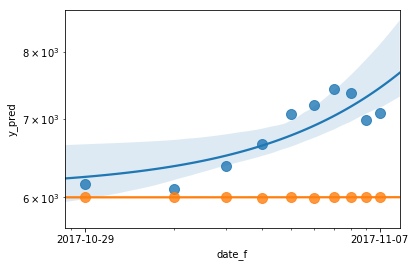

In [248]:
# Credit: https://stackoverflow.com/questions/44354614/seaborn-regplot-using-datetime64-as-the-x-axis
# Initialize figure and ax
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set(xscale="log", yscale="log")

# Create a regplot
df = merged.reset_index()
df = df.sort_values('Date')
df['date_f'] = pd.factorize(df['Date'])[0] + 1
mapping = dict(zip(df['date_f'], df['Date'].dt.date))
sns.regplot("date_f", "Price", df, ax=ax, scatter_kws={"s": 100})
sns.regplot("date_f", "y_pred", df, ax=ax, scatter_kws={"s": 100})
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)


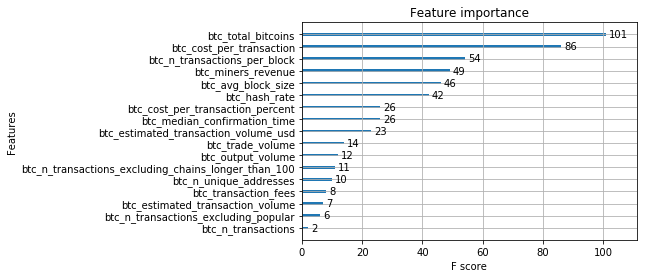

In [271]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()